In [52]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)

train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
test_df =  pd.read_csv('test.csv')
test_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
433,1894,90,RL,65.0,10926,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
114,1575,20,RL,83.0,11980,Pave,NaN,Reg,Low,AllPub,...,266,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1352,2813,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal
1238,2699,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1316,2777,70,RM,58.0,6451,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
640,2101,190,RM,69.0,9142,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1317,2778,70,RM,66.0,3960,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
304,1765,20,RL,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal
892,2353,60,FV,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
871,2332,60,RL,89.0,10557,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [3]:
test_df.shape

(1459, 80)

In [4]:
test_df.isnull().sum().sort_values(ascending=False)


PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

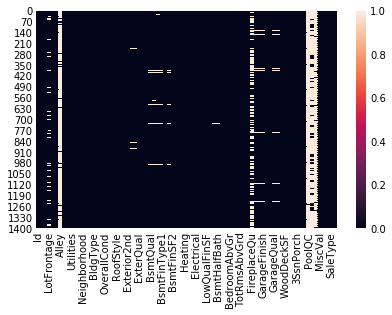

In [5]:
sns.heatmap(test_df.isnull())


In [6]:
test_df = test_df.dropna(axis=1, how='any', thresh = 1000) #Drop columns that contain more than 1000 NULL values


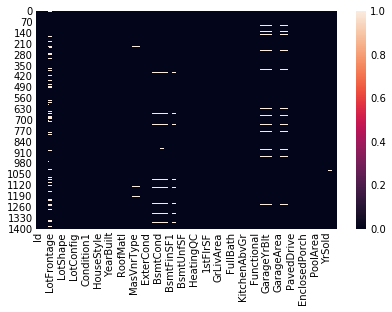

In [7]:
sns.heatmap(test_df.isnull())


In [8]:
test_df.isnull().sum().sort_values(ascending=False)


LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Heating           0
Id                0
Length: 75, dtype: int64

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [10]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])


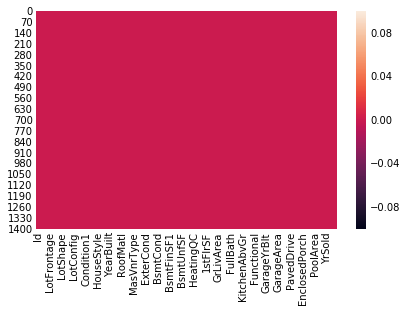

In [11]:
sns.heatmap(test_df.isnull())


In [12]:
test_df.isnull().sum().sort_values(ascending=False)


SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 75, dtype: int64

In [13]:
test_df.shape

(1459, 75)

In [14]:
train_df.isnull().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [15]:
train_df = train_df.dropna(axis=1, how='any', thresh = 1000) 

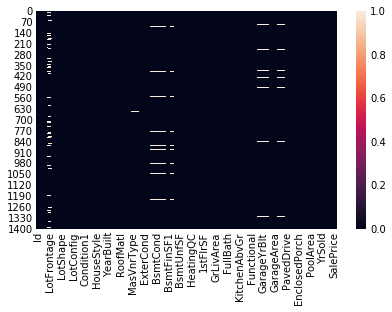

In [16]:
sns.heatmap(train_df.isnull())


In [17]:
nulls = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Count']
nulls.index.name = 'Feature'
nulls

,Count
Feature,
LotFrontage,259
GarageFinish,81
GarageType,81
GarageCond,81
GarageQual,81
GarageYrBlt,81
BsmtExposure,38
BsmtFinType2,38
BsmtFinType1,37


In [18]:
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])

train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])



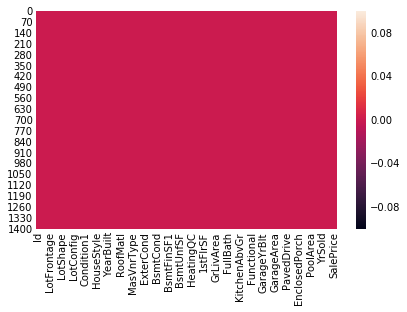

In [19]:
sns.heatmap(train_df.isnull())


In [20]:
train_df.shape

(1460, 76)

In [21]:
train_df.shape

(1460, 76)

In [22]:
def preprocess(raw_df):
  df = raw_df.copy()
  cat_variables = df.select_dtypes(include=['object']).columns
  cat_df = pd.get_dummies(df[cat_variables])
  num_df = df[[c for c in df if c not in cat_variables]]
  return pd.concat([cat_df, num_df], axis=1)

In [23]:
train_new = preprocess(train_df)
test_new = preprocess(test_df)

In [24]:
train_new.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,1,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,1,1,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,1,1,0,0,...,192,84,0,0,0,0,0,12,2008,250000


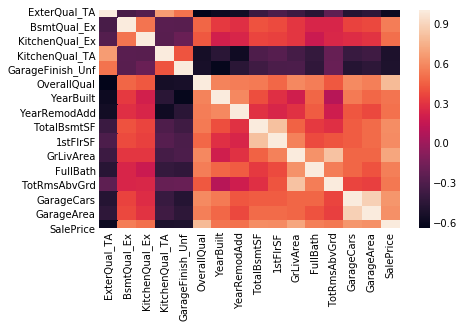

In [25]:
corr_mat = train_new.corr()
price_corr = corr_mat['SalePrice']
top_corr_features = price_corr[price_corr.abs() > 0.5].index

sns.heatmap(corr_mat.loc[top_corr_features, top_corr_features])

In [26]:
data = train_new.append(test_new,sort=False) 
bad_corr = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.05]
data = data.drop(bad_corr , axis=1)

In [27]:
train_new = data.iloc[:1460]
test_new = data.iloc[1460:]

In [28]:
train_new.shape


(1460, 168)

In [29]:
train_df.shape

(1460, 76)

In [30]:
quality_pivot = train_new.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

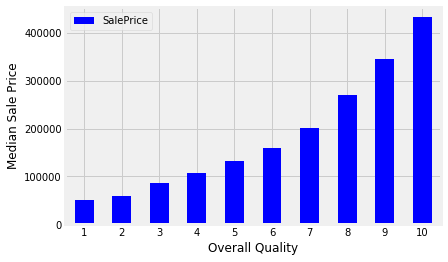

In [31]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

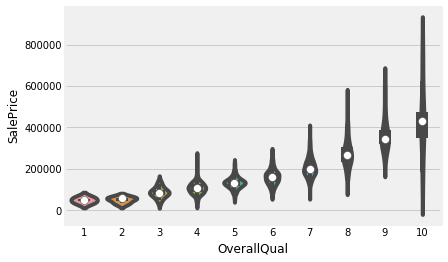

In [32]:
sns.violinplot(x='OverallQual', y='SalePrice', data=train_new)

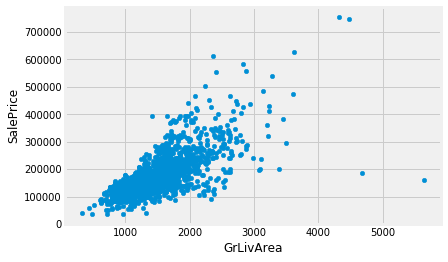

In [33]:
train_new.plot.scatter(x='GrLivArea', y='SalePrice')

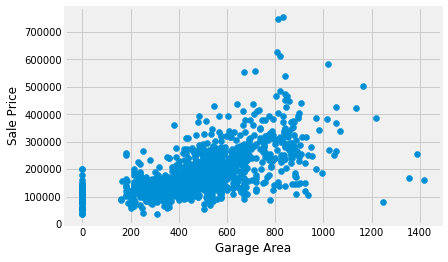

In [34]:
plt.scatter(x=train_new['GarageArea'], y=train_new['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Skew is: 1.8828757597682129


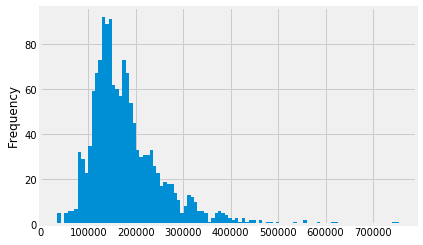

In [35]:
train_new.SalePrice.plot.hist(bins=100)
print ("Skew is:", train_new.SalePrice.skew())


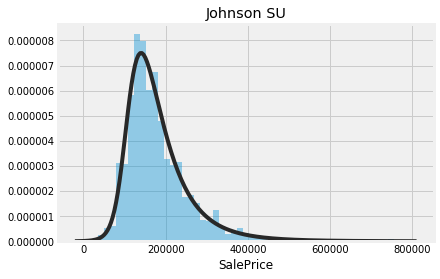

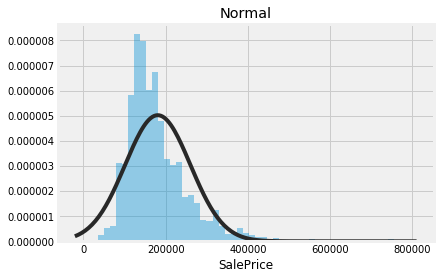

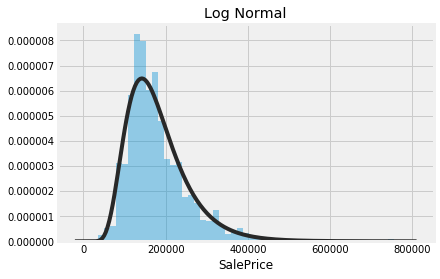

In [36]:
y = train_new['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [37]:
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    return np.where((df <(q1- 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))
                   )

for column in train_new:
    outlierList = np.array(outliers(train_new[column])[0]).tolist() 
    Newtrain_df = train_new.drop(outlierList) 
    
Newtrain_df = train_new

In [38]:
Newtrain_df.shape

(1460, 168)

Skew is: 0.12133506220520406


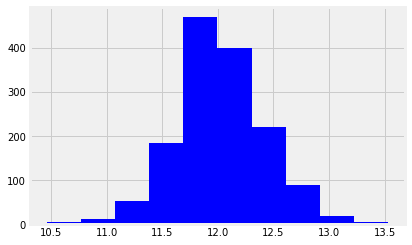

In [39]:
target = np.log(Newtrain_df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [40]:

from sklearn.linear_model import LinearRegression
y = np.log(Newtrain_df.SalePrice)
x = Newtrain_df.drop(['SalePrice'], axis=1)



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=42, test_size=.33)

In [42]:

from sklearn.dummy import DummyRegressor
baseline = DummyRegressor('mean')
baseline.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_test, baseline.predict(x_test)))

0.4130424840126158

In [43]:

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = model.predict(x_test)

In [45]:

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))


0.137757803346801

In [46]:

print (model.score(x_test, y_test))

0.8886518901986744


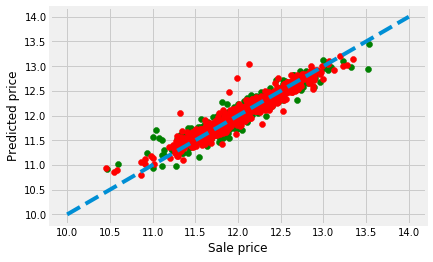

In [47]:
plt.scatter(y_test, y_pred, c='g')
plt.scatter(y_train, model.predict(x_train), c='r')
plt.xlabel("Sale price")
plt.ylabel("Predicted price")
plt.plot([10., 14.], [10., 14.], '--')

In [48]:
from sklearn import ensemble
cls = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=400, min_samples_split=2, max_depth=5)
cls.fit(x_train, y_train)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
cls.score(x_test, y_test)

0.8965792003293568

In [50]:

test_new = test_new.drop("SalePrice", axis=1) 
predictions = model.predict(test_new)
final_predictions = np.exp(predictions) 


sub = pd.DataFrame() 
sub['Id'] = test_df['Id']
sub['SalePrice'] = final_predictions
sub.to_csv("submission.csv", index=False) 

sub

,Id,SalePrice
0,1461,110877.333165
1,1462,146202.759905
2,1463,168717.651383
3,1464,187335.859495
4,1465,218583.908635
...,...,...
1454,2915,78534.164487
1455,2916,85614.743732
1456,2917,154689.278470
1457,2918,113547.608251
